In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

# 1. How to add a rectangle inside a figure with matplotlib

An easy alternative is to add a Rectangle to your axis using **`plt.gca()`** and **`add_patch()`**:  

- matplotlib.pyplot.**gca(** `**kwargs` **)**: 

    Get the current **Axes** instance on the current figure matching the given keyword args, or create one.  


- matplotlib.axes.Axes.**add_patch(** `p` **)**: 
    
    Add a **Patch** `p` to the list of axes patches; the clipbox will be set to the Axes clipping box. If the transform is not set, it will be set to transData.  
    Returns the patch.
    
    **Patch**: A patch is a 2D artist with a face color and an edge color.
    
    - class matplotlib.patches.**Patch(** `edgecolor=None, facecolor=None, color=None, linewidth=None, linestyle=None, antialiased=None, hatch=None, fill=True, capstyle=None, joinstyle=None, **kwargs` **)**
    
    
- class matplotlib.patches.**Rectangle(** `xy, width, height, angle=0.0, **kwargs` **)**:

    Draw a rectangle with lower left at `xy = (x, y)` with specified `width`, `height` and rotation `angle` (in degrees, anti-clockwise).
    
    In `**kwargs` you can add:
    
    - **`fill=`** `True/False`. This is a boolean indicating whether to fill the rectangle

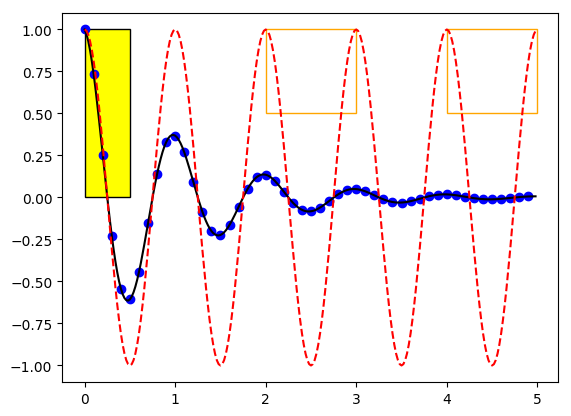

In [57]:
# Define some function to plot
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# Create a new figure.
plt.figure()

# Plot the function f(t) 
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

# Plot another function in the same figure
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

# Get the current Axes
currentAxis = plt.gca()

# Add a Rectangle in position (0,0) with width=0.5 and height=1, and with facecolor="yellow"
currentAxis.add_patch(Rectangle((0, 0), width=0.5, height=1, facecolor="yellow", edgecolor="black"))

# Add a Rectangle in position (2,0.5) with width=0.5 and height=1 without fill but with color="orange"
currentAxis.add_patch(Rectangle((2, 0.5), width=1, height=0.5, fill=False, edgecolor="orange"))

# Add a Rectangle in position (4,0.5) with width=0.5 and height=1 without fill but with color="orange"
currentAxis.add_patch(Rectangle((4, 0.5), width=1, height=0.5, facecolor="none", edgecolor="orange"))

# Show figure
plt.show()

Another way to achieve last result using **`PatchCollection()`** and **`add_collection()`**:

- class matplotlib.collections.**PatchCollection(** `patches, match_original=False, **kwargs` **)**:

    A generic collection of **patches**.  
    This makes it easier to assign a color map to a heterogeneous collection of **patches**.  
    This also may improve plotting speed, since PatchCollection will draw faster than a large number of patches.
    
    - **patches:** a sequence of **Patch** objects. This list may include a heterogeneous assortment of different patch types.


- matplotlib.axes.Axes.**add_collection(** `collection, autolim=True` **)**:

    Add a **Collection** instance to the axes.  
    Returns the collection.

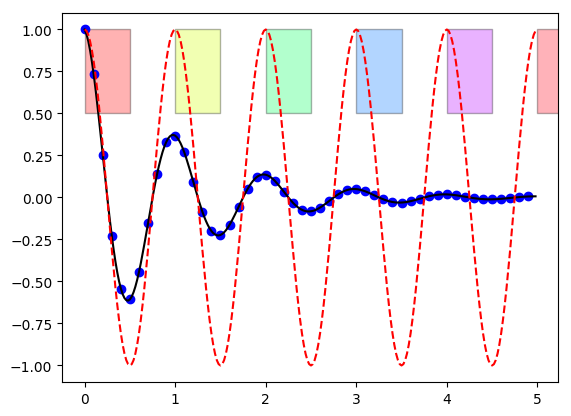

In [69]:
# Close last figure instance
plt.close()

# Create a new figure.
plt.figure()

# Plot the function f(t) 
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

# Plot another function in the same figure
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

# Get the current Axes
currentAxis = plt.gca()

# Create an empty secuence of Patches
patches = []

# Append rectangles
for i in range(6):
    patches.append(Rectangle((i, 0.5), width=0.5, height=0.5))

# Secuence of colors
colors = np.linspace(0, 1, len(patches))

# Create collection
collection = PatchCollection(patches, edgecolor="black", cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))

# Add collection
currentAxis.add_collection(collection)

# Show figure
plt.show()

# 2. Manage data with PANDAS

We have two types of data files:

- **Henon_points.dat :** which stores points of the Henon map attractor.  

    Hénon(x,y) = f(x,y) = (a - x^2 + b y , x)  
    
    Where:
        
        a = 1.4  
        b = 0.3  
        x0 = 0.5  
        y0 = 0.5  
        transient = 1000000  
        Npoints = 1000000  

- **Box_Data_Exponent_n.dat :** which stores the information of the boxes found with the exponent **`n`**.  

Let's take a look:

In [3]:
data = pd.read_csv("Henon_points.dat", delim_whitespace=True, skipinitialspace=True)
data

,x,y
0,1.775576,-0.119085
1,-1.788397,1.775576
2,-1.265692,-1.788397
3,-0.738496,-1.265692
4,0.474916,-0.738496
5,0.952906,0.474916
6,0.634444,0.952906
7,1.283352,0.634444
8,-0.056660,1.283352
9,1.781795,-0.056660


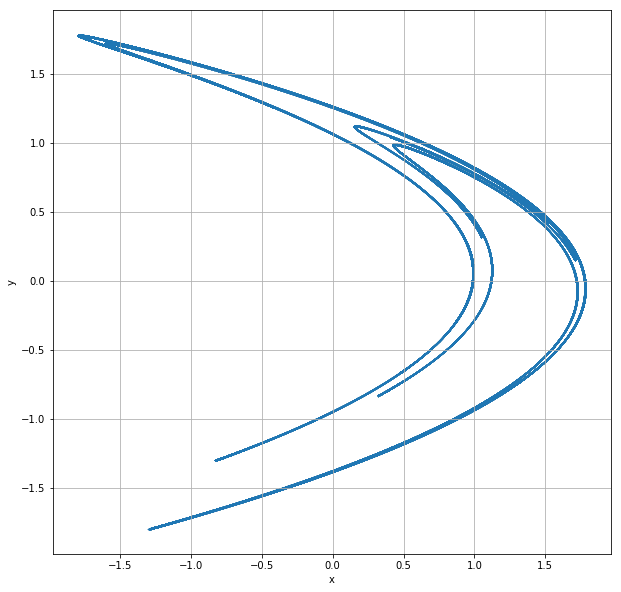

In [2]:
# Close last figure instance
plt.close()

# Read data for the Henon map attractor
data = pd.read_csv("Henon_points.dat", delim_whitespace=True, skipinitialspace=True)

# Create a dataframe
df=pd.DataFrame(data)

# Make a scatter plot for the dataframe. 's' means size and corresponds to the size of the points used
df.plot.scatter(x='x', y='y', s=0.01, grid=True, figsize=(10,10));

# Show figure
plt.show()

In [4]:
boxes = pd.read_csv("Boxes_Data_Exponent_0.dat", delim_whitespace=True, skipinitialspace=True)
print('Length of boxes array = ', len(boxes), '\n')
boxes

Length of boxes array =  11 



,x0,x1,y0,y1
0,1.0,2.0,-1.0,0.0
1,0.0,1.0,0.0,1.0
2,-2.0,-1.0,1.0,2.0
3,1.0,2.0,0.0,1.0
4,0.0,1.0,-2.0,-1.0
5,-1.0,0.0,-2.0,-1.0
6,-1.0,0.0,1.0,2.0
7,0.0,1.0,1.0,2.0
8,0.0,1.0,-1.0,0.0
9,-2.0,-1.0,-2.0,-1.0


In [5]:
boxes['x0']

0     1.0
1     0.0
2    -2.0
3     1.0
4     0.0
5    -1.0
6    -1.0
7     0.0
8     0.0
9    -2.0
10   -1.0
Name: x0, dtype: float64

In [6]:
boxes['x0'][0]

1.0

# 3. Join everything for visualizing the boxes for different exponents

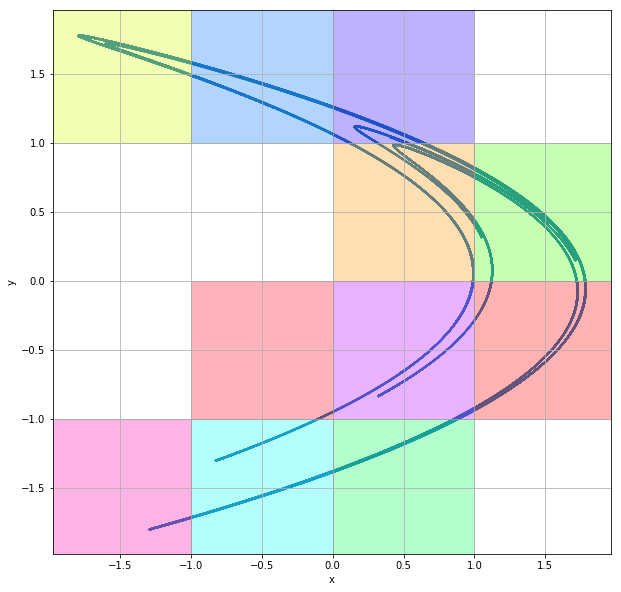

In [7]:
# Close last figure instance
plt.close()

# Read data for the Henon map attractor
data = pd.read_csv("Henon_points.dat", delim_whitespace=True, skipinitialspace=True)

# Create a dataframe
df=pd.DataFrame(data)

# Make a scatter plot for the dataframe. 's' means size and corresponds to the size of the points used
df.plot.scatter(x='x', y='y', s=0.01, grid=True, figsize=(10,10));

# Get the current Axes
currentAxis = plt.gca()

# Read data for boxes
boxes = pd.read_csv("Boxes_Data_Exponent_0.dat", delim_whitespace=True, skipinitialspace=True)

# Create an empty secuence of Patches
patches = []

# Append rectangles
for i in range(len(boxes)):
    box_origin = (boxes['x0'][i], boxes['y0'][i])
    box_width = boxes['x1'][i]-boxes['x0'][i]
    box_height = boxes['y1'][i]-boxes['y0'][i]
    patches.append(Rectangle(box_origin, width=box_width, height=box_height))

# Secuence of colors
colors = np.linspace(0, 1, len(patches))

# Create collection
collection = PatchCollection(patches, edgecolor="black", cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))

# Add collection
currentAxis.add_collection(collection)

# Show figure
plt.show()

# 4. Make a cycle to see the results with all the exponents

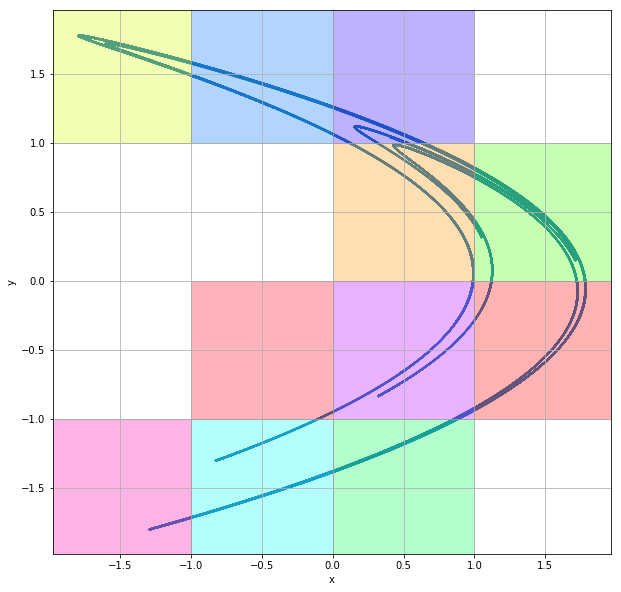

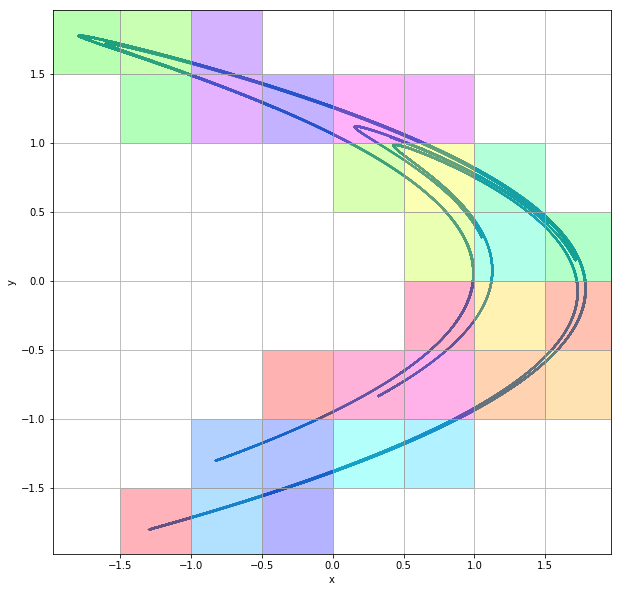

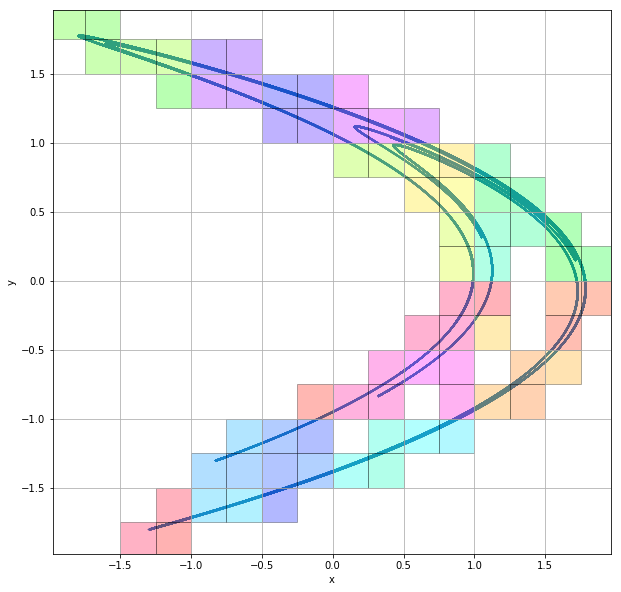

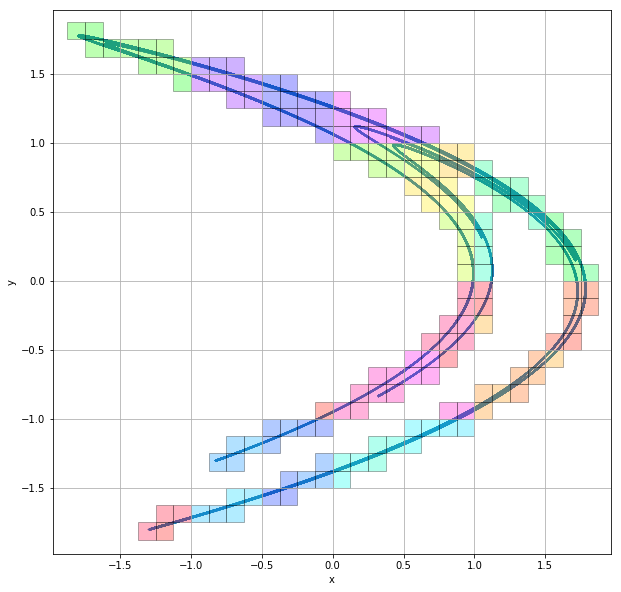

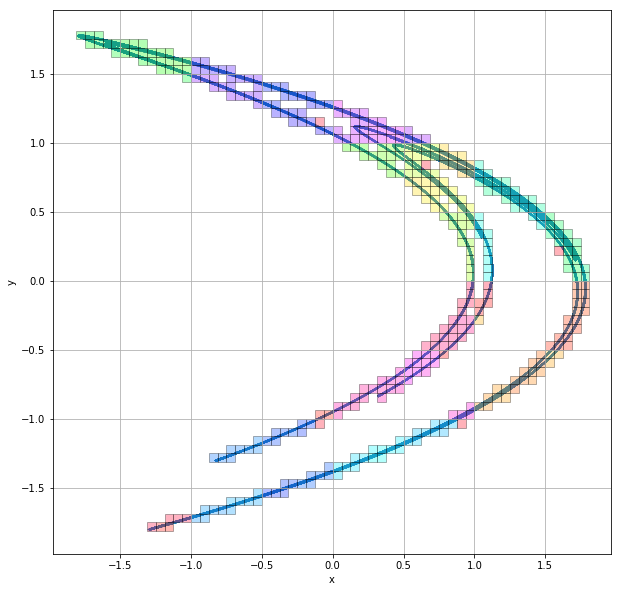

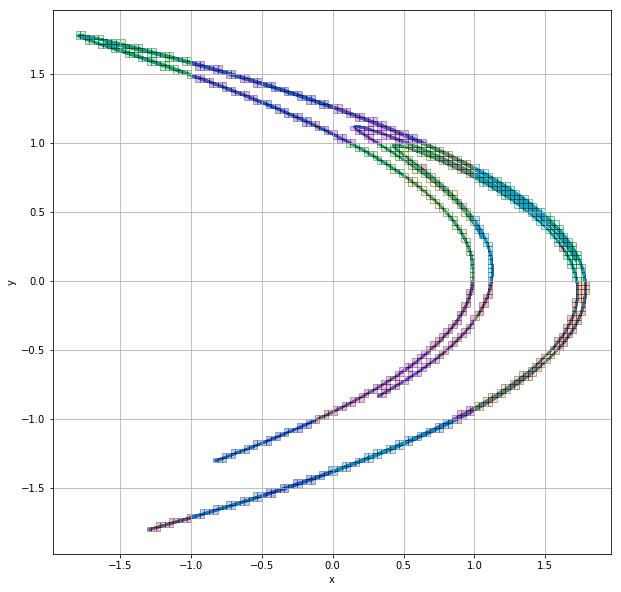

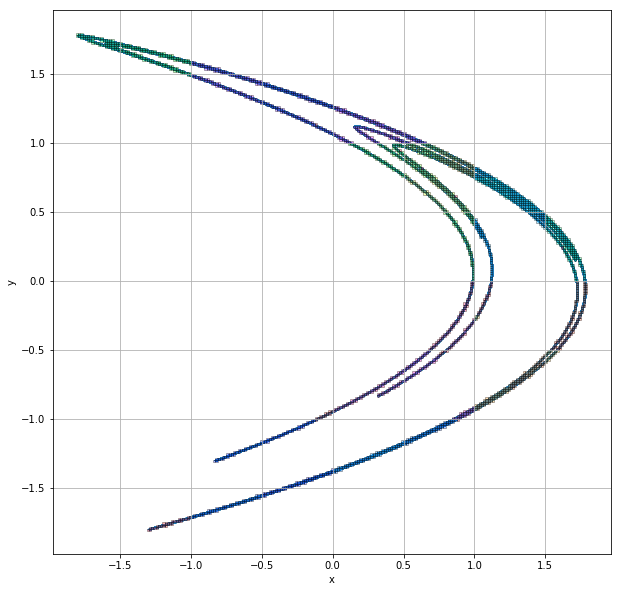

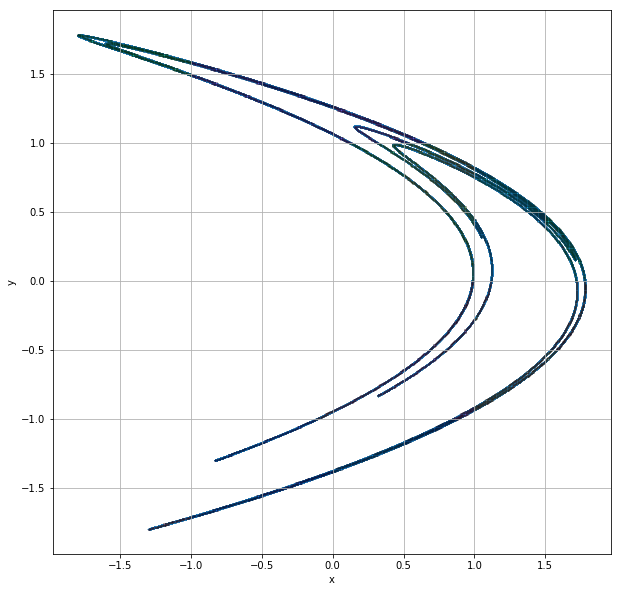

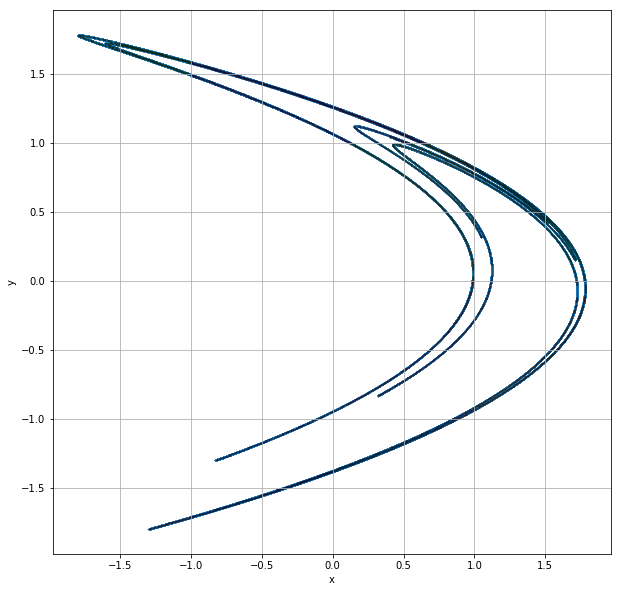

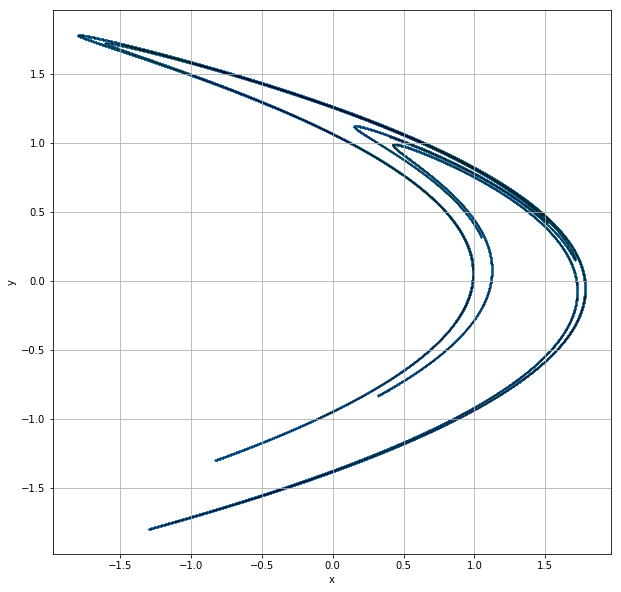

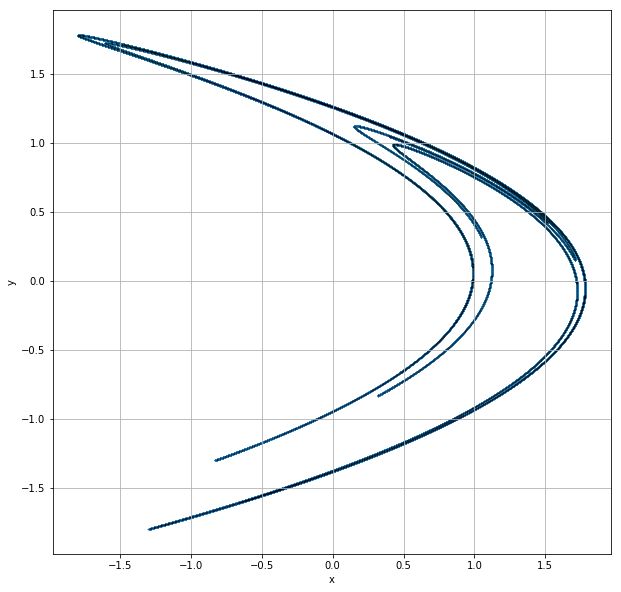

In [8]:
# Read data for the Henon map attractor
data = pd.read_csv("Henon_points.dat", delim_whitespace=True, skipinitialspace=True)

# Create a dataframe
df=pd.DataFrame(data)

# Create a cycle for the exponent
NExponents = 11
for n in range(NExponents):
    Exponent_file = 'Boxes_Data_Exponent_' + str(n) + '.dat'

    # Close last figure instance
    plt.close()

    # Make a scatter plot for the dataframe. 's' means size and corresponds to the size of the points used
    df.plot.scatter(x='x', y='y', s=0.01, grid=True, figsize=(10,10));

    # Get the current Axes
    currentAxis = plt.gca()

    # Read data for boxes
    boxes = pd.read_csv(Exponent_file, delim_whitespace=True, skipinitialspace=True)

    # Create an empty secuence of Patches
    patches = []

    # Append rectangles
    for i in range(len(boxes)):
        box_origin = (boxes['x0'][i], boxes['y0'][i])
        box_width = boxes['x1'][i]-boxes['x0'][i]
        box_height = boxes['y1'][i]-boxes['y0'][i]
        patches.append(Rectangle(box_origin, width=box_width, height=box_height))

    # Secuence of colors
    colors = np.linspace(0, 1, len(patches))

    # Create collection
    collection = PatchCollection(patches, edgecolor="black", cmap=plt.cm.hsv, alpha=0.3)
    collection.set_array(np.array(colors))

    # Add collection
    currentAxis.add_collection(collection)

    # Show figure
    plt.show()

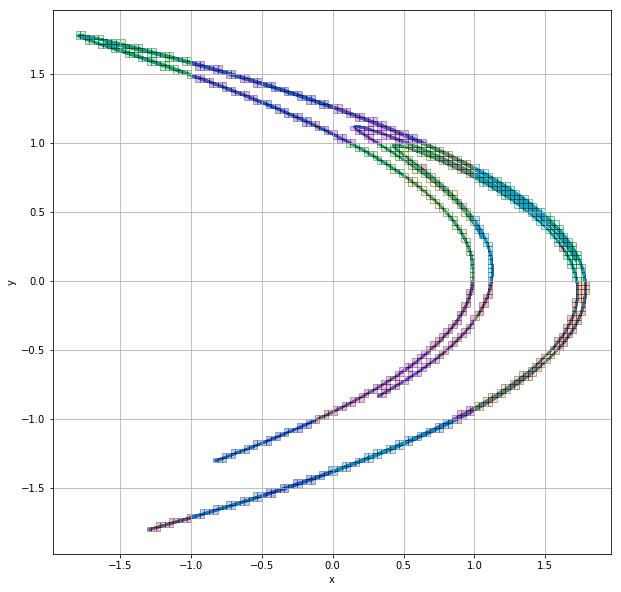

In [10]:
# For a specific Exponent
n = 5
Exponent_file = 'Boxes_Data_Exponent_' + str(n) + '.dat'

# Read data for the Henon map attractor
data = pd.read_csv("Henon_points.dat", delim_whitespace=True, skipinitialspace=True)

# Create a dataframe
df=pd.DataFrame(data)


# Close last figure instance
plt.close()

# Make a scatter plot for the dataframe. 's' means size and corresponds to the size of the points used
df.plot.scatter(x='x', y='y', s=0.01, grid=True, figsize=(10,10));

# Get the current Axes
currentAxis = plt.gca()

# Read data for boxes
boxes = pd.read_csv(Exponent_file, delim_whitespace=True, skipinitialspace=True)

# Create an empty secuence of Patches
patches = []

# Append rectangles
for i in range(len(boxes)):
    box_origin = (boxes['x0'][i], boxes['y0'][i])
    box_width = boxes['x1'][i]-boxes['x0'][i]
    box_height = boxes['y1'][i]-boxes['y0'][i]
    patches.append(Rectangle(box_origin, width=box_width, height=box_height))

# Secuence of colors
colors = np.linspace(0, 1, len(patches))

# Create collection
collection = PatchCollection(patches, edgecolor="black", cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))

# Add collection
currentAxis.add_collection(collection)

# Show figure
plt.show()

# 5. Make Box Dimension analysis for the Henon map